<a href="https://colab.research.google.com/github/it22543332/Lab4/blob/main/lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as numpy
import pandas as pd
df = pd.read_csv('Au_nanoparticle_dataset.csv')


In [5]:
features = ['N_total','N_bulk','N_surface','R_avg']
df_filtered =df[features].copy()

In [6]:
df_filtered.head(20)

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [7]:
#summary using describe()
summary =df_filtered.describe().T[['mean','std','25%','50%','75%']]
summary.columns = ['Mean','StdDev','Q1','Median','Q3']
print(summary)

                  Mean       StdDev           Q1      Median           Q3
N_total    3476.786500  3679.286769  1061.000000  1867.00000  4503.000000
N_bulk     2521.550250  2976.232459   618.750000  1199.00000  3183.000000
N_surface   955.236250   721.870220   437.000000   666.00000  1301.750000
R_avg        20.654363     7.610716    15.160725    18.62925    25.525125


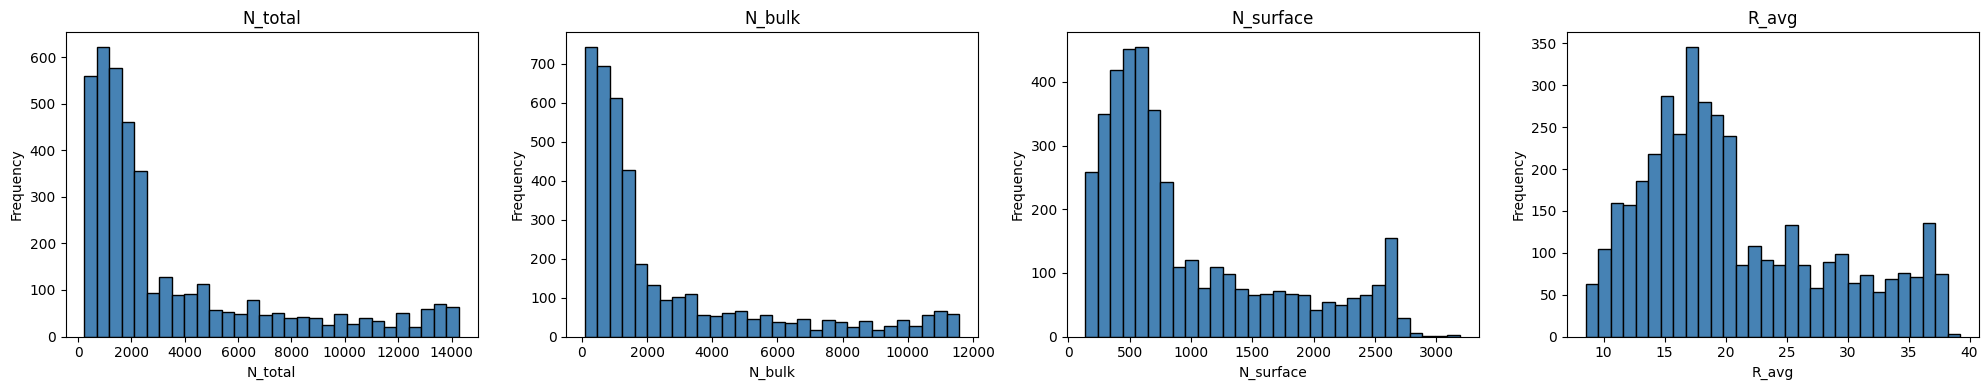

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,4, figsize=(20,4))
for ax, col in zip(axes,features):
    ax.hist(df_filtered[col], bins=30, color='steelblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

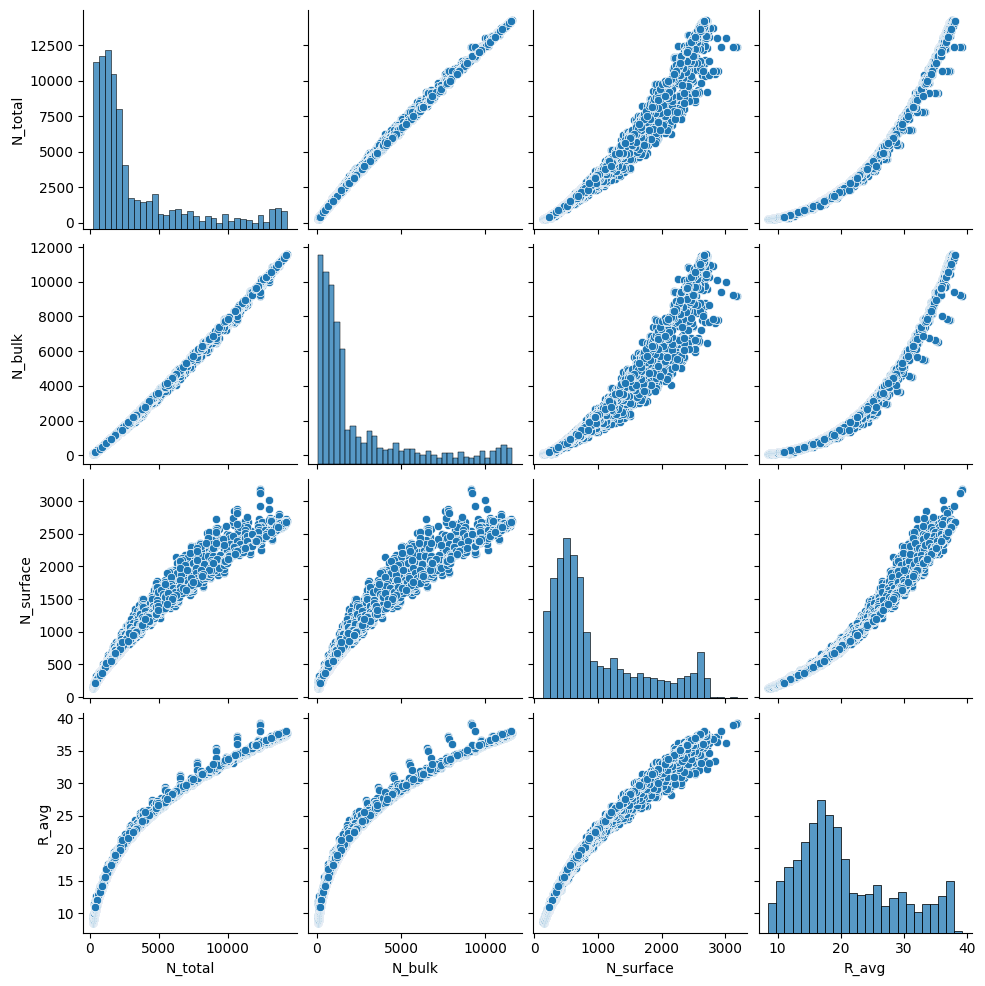

In [16]:
import seaborn as sns

sns.pairplot(df_filtered, diag_kind='hist',corner=False)
plt.show()

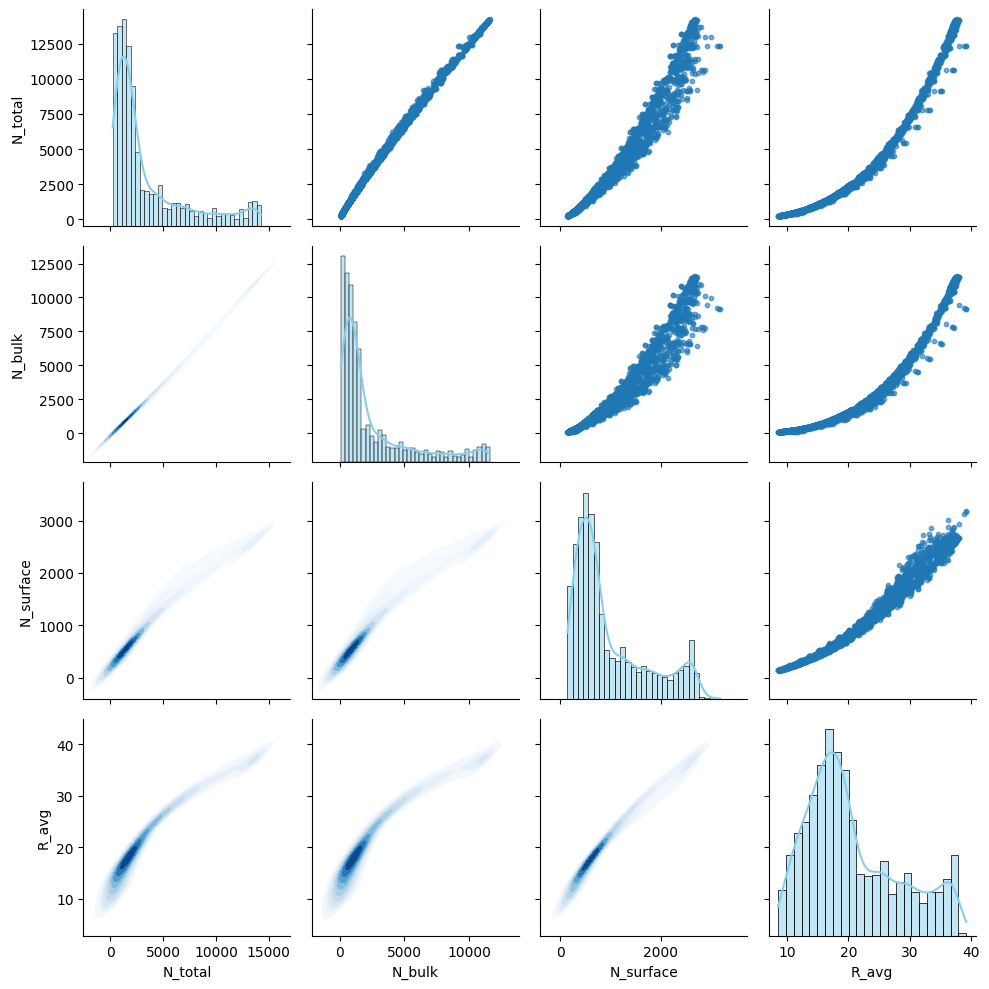

In [17]:
# Initialize PairGrid
g = sns.PairGrid(df_filtered, diag_sharey=False)

# Diagonal: histogram + KDE
g.map_diag(sns.histplot, kde=True, color='skyblue', edgecolor='black')

# Lower triangle: bivariate KDE contour
g.map_lower(sns.kdeplot, cmap='Blues', fill=True, thresh=0.05)

# Optionally, leave upper blank or mirror
g.map_upper(plt.scatter, s=10, alpha=0.6)

plt.tight_layout()
plt.show()